# Fitting $t$-student Copula

In this jupyter notebook, we implement algos to fit a bivariate $t$-student copula.

The algos we will use have been well covered in many financial publications. For this reason we will not spend time on deriving them. Our interest is in writing them in python.

We personally found the following two materials very useful for preparing this notebook:

Cherubini U, Luciano E, Vecchiato W, 2004. Copula Methods in Finance, Wiley,

and

Mashal R. and Zeevi A. 2002, Beyond Correlation: Extreme co-movements between financial assets, working paper, Columbia Graduate School of Business.

There are also few libraries written in R covering variuos Copula topics. 

As a note, this is our second python workbook on copulas. In our first one, we covered Archimedean copulas. 

#### Copula canonical representation

To estimate and calibrate a bivariate $t$-student copula, we apply the maximum likelihood estimation (MLE) to the associated copula density.

To derive the copula density, we use the copula canonical representation (at page 145 of Cherubini, Luciano, Vecchiato), which relates the copula density to the density of the distribution $F$, denoted as $f$


$$f(x_1,x_2,..,x_m) = c(F_1(x_1),F_2(x_2),..,F_m(x_m)) \prod_{i=1}^{m}f_{i}(x_i)$$

where 
$c(F_1(x_1),F_2(x_2),..,F_m(x_m))$ is the density copula

$$c(F_1(x_1),F_2(x_2),..,F_m(x_m)) = \frac{\partial^{m}{(C(F_1(x_1),F_2(x_2),..,F_m(x_m)))}}{\partial{F_1(x_1)}\partial{F_2(x_2)}..\partial{F_m(x_m)}}$$


$C(F_1(x_1),F_2(x_2),..,F_m(x_m))$ is the copula

$$C(F_1(x_1),F_2(x_2),..,F_m(x_m)) = F(x_1,x_2,..,x_m)$$


and $f_{i}(x_i)$ are the densities of the marginal distributions $F_i({x_i})$ 

$$f_{i}(x_i) = \frac{dF_i({x_i})}{d{x_i}}$$

*For the definition of the copula, please refer to the literature above, or instead go to our repository on Archimedean Copulas.  

### Copula objects 

We will not work with the normal copula, neverthless it is worth writing its density, log likelihood function and maximim likelihood estimator, if only to compare them with the $t$ copula objects

#### Normal Copula 

In the normal copula, there is only one object to be estimated, as it will be clear from the expression in (3), and are the elements of the correlation matrix $R$.

1. Density 

$$\frac{1}{{|R|^{1/2}\sqrt[m]{(2\pi)}}}e^{-0.5x^{'}R^{-1}x}=c(\Phi(x_1),\Phi(x_2),..,\Phi(x_m)) \prod_{i=1}^{m}\frac{1}{\sqrt{(2\pi)}}e^{-0.5x_{i}^{2}}$$

$$c(\Phi(x_1),\Phi(x_2),..,\Phi(x_m)) = \frac{\frac{1}{{|R|^{-1}\sqrt[m]{(2\pi)}}}e^{-0.5x^{'}R^{-1}x}}{ \prod_{i=1}^{m}\frac{1}{\sqrt{(2\pi)}}e^{-0.5x_{i}^{2}}}$$


With 
$u_i=\Phi(x_i)$ so that $x_i=\Phi^{-1}(u_i)$, which are the cumulative standard normal distribution function and its inverse,

and 

$s = (\Phi^{-1}(u_1),\Phi^{-1}(u_2),..,\Phi^{-1}(u_m))^{'}$

the density is written as 

$$c(u_1,u_2,..,u_m;R) = \frac{1}{\sqrt{|R|}}exp\left(-0.5s^{'}(R^{-1}-I)s\right)$$


2. Log-likelihood function (where now we have added the subscript $t$ to be able to sum over all the data avaiable) 

$$L^{gaussian}(\theta) = -\frac{T}{2}ln(|R|)-\frac{1}{2}\sum_{t=1}^Ts_t{^{'}(R^{-1}-I)s_t}$$

3. The MLE of $\theta$ = $R$ is

$$\tilde{R} = \frac{1}{T}\sum_{t=1}^Ts_t{^{'}s_t}$$

from the fact that for maximization and minimization problems, we need a differentiable log-likelihood function in $\theta$
$$\frac{\partial}{\partial{\theta}}L(\theta) = 0$$, 


$$\tilde{\theta}= \tilde{R}$$

$$\frac{\partial}{\partial{R^{-1}}}L^{gaussian}(\theta) = \frac{T}{2}R-\frac{1}{2}\sum_{t=1}^Ts_t{^{'}s_t}$$

#### $t$ Copula

1. The density of a $t$ copula is below (at page 148 of Cherubini, Luciano, Vecchiato you can also read the various steps to arrive at its expression) 

$$c(u_1,u_2,..,u_m;R,v) = \frac{1}{\sqrt{|R|}}\frac{\Gamma(\frac{v+m}{2})}{\Gamma(\frac{v+1}{2})}\left(\frac{\Gamma(\frac{v}{2})}{\Gamma(\frac{v+1}{2})}\right)^m\frac{\left(1+\frac{s^{'}R^{-1}s}{v}\right)^{-\frac{v+m}{2}}}{ \prod_{i=1}^{m}\left(1+\frac{s_{i}^{2}}{v}\right)^{-\frac{v+1}{2}}}$$

where now

$s_i = t^{-1}_{v}(u_i)$ is the $t$ inverse with $v$ degrees of freedom


2. log-likelihood function (where now we have added the subscript $t$ to be able to sum over all the data avaiable) 

$$\frac{\partial}{\partial{R^{-1}}}L^{t-student}(\theta) = \frac{T}{2}R-\frac{v+m}{2}\sum_{t=1}^T\frac{s_t^{'}s_t}{\left(1+\frac{s_t^{'}R^{-1}s_t}{v}\right)}$$

3. The MLE of $R$ must satisfy the following

$$\tilde{R} = \frac{v+m}{2m}\sum_{t=1}^T\frac{s_t^{'}s_t}{\left(1+\frac{s_t^{'}\tilde{R}^{-1}s_t}{v}\right)}$$

not that $\tilde{R}$ appears on both sides.

#### Estimation 

For the  𝑡  Copula, there isn't an easy expression to maximize. Both  𝑅  and  𝑣  need to be estimated together with the parameters of the marginals.

To avoid such a complex estimation, two methods have been proposed and used in the past:

1 - Bouye', Durrelman, Nikeghbali, Riboulet and Roncalli method

and

2 - Mashal and Zeevi method

With Bouye', Durrelman, Nikeghbali, Riboulet and Roncalli method (BDNRR) the following steps are taken:

1. Transform the data into uniform variates $U$

2. For each value of the degrees of freedom that are used during the fitting, 
    
    - transform the uniform variates in $s_{i,t} = t^{-1}_{v}(u_{i,t})$ with $v$ degrees of freedom and for all dates $t$'s 
    - estimate the correlation matrix $R_{v,k=0}$ assuming a normal copula with the expression (3) above
    - run the following recursive scheme to obtain the final correlation matrix
    $$R_{v,k+1}= \frac{v+M}{vT}\sum_{t=1}^T\frac{s_t{^{'}s_t}}{\left(1+\frac{s^{'}_{t}R^{-1}_{v,k}s_{t}}{v}\right)}$$

    - rescale the correlation matrix entries so that they have unit diagonal entries
    $$(R_{v,k+1})_{i,j} = \frac{(R_{v,k+1})_{i,j}}{\sqrt{(R_{v,k+1})_{i,i}(R_{v,k+1})_{j,j}}}$$
    
3. For each value of the degrees of freedom that are used during the fitting, run the $t$ copula density using the corresponding correlation matrix found in 2.
 

Mashal and Zeevi pointed out that the BDNRR method can become very slow as the dimension increases. 

They also argued that the quality of the BDNRR method might be affected by numerical instability due to the inversion of close to singular matrices.

They proposed a two step fitting:

1. First estimate the correlation matrix with the following relationship

$$\tau(X_i,X_j) = \frac{2}{\pi}arcsin(R_{i,j}) $$
with $\tau(X_i,X_j)$ as the Kendall's tau rank correlation coefficient between $X_i$ and $X_j$  

2. Once the correlation matrix is estimated, the log likelihood of the canonical representation of the density of the $t$-student copula is maximized. 

The algo is much simpler to implement and to run.

#### Implementation 

We start by importing the python libraries we are using in this notebook

In [1]:
import math

import numpy as np
import pandas as pd

from scipy.stats import norm
from scipy import stats
from scipy.special import gamma

import numpy.linalg

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Our 2 dimentional data was generated in R, using the package $copula$. We simulated 1000 point returns for each series.

For the marginals, we assumed a normal distribution with 0 as a mean and 1 as a standard deviation.

The two series were joined with a t-copula with 5 degrees of freedom, and a correlation of 0.30.

We also used the same package to fit the t-copula: in R we found a rho coefficient of 0.294 and degrees of freedom of 4.15. 

The R script is attached.

In [2]:
Returns = pd.read_csv ('Returns01.csv', index_col=False)
print (Returns.head(2))
print (Returns.tail(2))
size = len(Returns)

          X         Y
0 -0.167493  0.363391
1 -0.760309  0.113879
            X         Y
998  0.874971  0.385029
999  0.803454 -1.437187


In [3]:
# Let's quickly print some statistics
print (np.corrcoef(Returns.X, Returns.Y))
print ("--------------------------")
print (Returns.X.mean())
print (Returns.X.std())
print (Returns.Y.mean())
print (Returns.Y.std())

[[1.         0.27756621]
 [0.27756621 1.        ]]
--------------------------
0.007445748123000016
0.9941697977738432
-0.08497005465700007
0.9997046286273831


In [4]:
# Standardize the series. We do not need as the original series was already a standardised one.
S = (Returns-Returns.mean() )/Returns.std()

# Check
print(S.mean())
print(S.std())
# and print the correlation matrix
print(np.corrcoef(S.X, S.Y))
# The correlation should be the same as before, as the transformation on the data was a linear transformation

X    1.643130e-17
Y    7.549517e-17
dtype: float64
X    1.0
Y    1.0
dtype: float64
[[1.         0.27756621]
 [0.27756621 1.        ]]


In [5]:
S.head()

,X,Y
0,-0.175964,0.448494
1,-0.772258,0.198908
2,0.438080,1.082352
3,0.600893,0.084057
4,0.910151,0.022311


In [6]:
# Another check! For a "standardised" series the correlation matrix can also be calculated as follows  
np.dot(np.transpose(S),S)/(size -1)

array([[1.        , 0.27756621],
       [0.27756621, 1.        ]])

Let's chart the returns

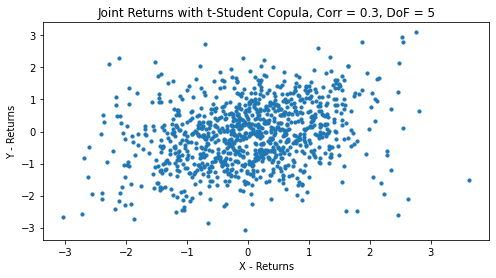

In [7]:
plt.figure(figsize=(8, 4)) 
plt.scatter(Returns.X, Returns.Y, s = 10)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Joint Returns with t-Student Copula, Corr = 0.3, DoF = 5')
plt.xlabel('X - Returns')
plt.ylabel('Y - Returns')
plt.show()

In [8]:
def Determ(rho): # rho is the correlation coefficient
    # calculates the determinant of a correlation matrix A
    A = [[1, rho],[rho, 1]]
    A = np.matrix(A)        
    D = np.linalg.det(A)
    return D

def t_CopulaDensity(u, v, rho, dof):
    # calculates the bivariate t-Copula density given:
    # u and v ~U(0,1), 
    # a correlation value rho and 
    # degrees of freedom DoF
    
    s1 = stats.t.ppf(u, dof)# t_inv(u, dof)
    t1 = stats.t.ppf(v, dof)# t_inv(v, dof)
  
    D  = np.sqrt(Determ(rho))
    
    block1 = gamma((dof + 2)/2.0) * gamma(dof / 2.0)
    
    block2 = D * gamma((dof + 1)/2.0)**2

    block3 = (1+(s1*s1/dof))**(-.5*(dof+1)) * (1+(t1*t1/dof))**(-.5*(dof+1))
    
    A     = [[1, rho],[rho, 1]]
    A     = np.matrix(A)    
    InvA  = np.linalg.inv(A)         
    Vect  = np.array([s1,t1])
    VectT = np.matrix.transpose(Vect)
    AA    = np.dot(VectT, InvA)
    
    block4 = np.dot(AA, Vect)[0,0]
    block4 = block4 /dof   
    block4 = (1 + block4)**(-.5*(dof+2))

    return block1*block4 / (block2 * block3)

In [9]:
def ff(x, y, rho):    
    # This function is used in the NormalCopulaDensity to calculate the copula density value
    A     = [[1, rho],[rho, 1]]
    A     = np.matrix(A)    
    InvA  = numpy.linalg.inv(A)  
    I     = [[1, 0],[0, 1]]
    I     = np.matrix(I)        
    InvA_I= InvA - I
    Vect  = np.array([x,y])
    VectT = np.matrix.transpose(Vect)
    AA    = np.dot(VectT, InvA_I)
    AA    = np.dot(AA, Vect)
    return np.exp(-0.5*AA[0,0])

def NormalCopulaDensity(u,v, rho):      
    # calculates the bivariate Normal Copula density given u and v ~U(0,1) and a correlation value rho
    
    s = norm.ppf(u) 
    t = norm.ppf(v)        
    D = Determ(rho)    
    return 1/ np.sqrt(D) * ff(s, t, rho)

In [10]:
# The t copula density is such a complex formula. Can we check we correctly implemented it?
# For very large deegres of freedom, it should be close to normal copula density
corr = 0.55
dof  = 100
u    = 0.75
v    = 0.25
print(t_CopulaDensity(u,v, corr, dof))
print(NormalCopulaDensity(u,v, corr))

0.6829197453824104
0.686666173966271


In [11]:
# This calculates the target function to be maximized as described in Mashal and Zeevi (2002)
# For each row observation in the data set U, we compute the log transformation of the t-copula density and sum over
# We note that the U's are the empirical marginal transformations of the equity returns.
# Note: The empirical marginal transformation fucntion is implemented below
def t_copula_LogL(U, DoF, rho):
    size      = len(U)
    Sum_Log_L = 0
    for t in range(size):
        UU    = U.iloc[t]
        u     = UU.X
        v     = UU.Y
        Log_L = np.log(t_CopulaDensity(u, v, rho, DoF))
        Sum_Log_L = Sum_Log_L + Log_L
    return Sum_Log_L

In [12]:
def Empirical_dis(Y):    
    # Computes the empirical marginal transformation, for the asset returns, 
    # as described in Mashal and Zeevi (2002).
    size = len(Y)
    X    = np.zeros(size)
    count= 0
    for k in range(size):
        for s in range(size):
            if (Y[s] <= Y[k]):
                count = count + 1
                
        X[k] = count / size # the empirical distribution function
        
        if X[k] == 1:
            X[k] =.999999 # otherwise, if 1, then we have problem in using the t inverse
        
        count = 0
    return X

In [13]:
# We now transform the equity returns via the empirical marginal transformation.
U1    = Empirical_dis(S.X)
U2    = Empirical_dis(S.Y)
U_emp = np.array(([U1 , U2]))
U_emp = np.matrix.transpose(U_emp)

In [14]:
# we are going to use the array U, when testing the Mashal and Zeevi method
U = np.array(([U1 , U2])) 
U = np.matrix.transpose(U)

In [15]:
print(U_emp.shape)
U_emp =  pd.DataFrame(U_emp)
U_emp.columns =['X', 'Y']

(1000, 2)


 Let's see the empirical marginal transformation of the returns

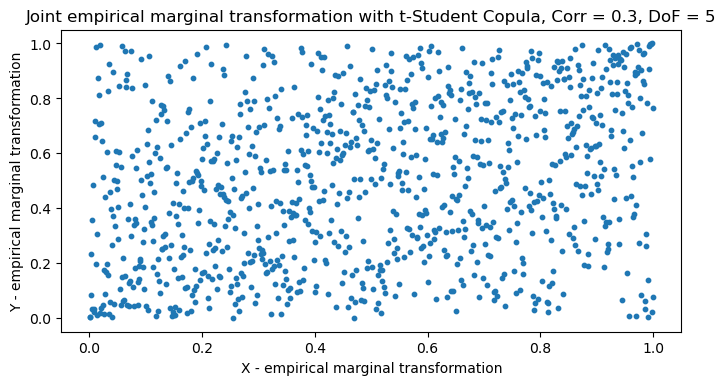

In [16]:
plt.figure(figsize=(8, 4)) 
plt.scatter(U1, U2,s = 10)
plt.rcParams.update({'figure.figsize':(10,8)}) #, 'figure.dpi':100})
plt.title('Joint empirical marginal transformation with t-Student Copula, Corr = 0.3, DoF = 5')
plt.xlabel('X - empirical marginal transformation')
plt.ylabel('Y - empirical marginal transformation')
plt.show()

In [17]:
# Let's test the t-copula density with 100 as DoF.
CORR_EST = np.dot(np.transpose(S),S)[1,0]/(size -1)
print(t_copula_LogL(U_emp, 100, CORR_EST))

43.716564868584726


#### Bouye', Durrelman, Nikeghbali, Riboulet and Roncalli method (BDNRR)

We now implement a function for the estimation of the correlation matrix under BDNRR method 

In [18]:
def CML_BDNRR(R, DoF, E_returns, printing = False):
# ***************************************************
# This algo only deals with a bivarite example ONLY 
# It estimates the 2 by 2 correlation matrix for the 
# Student's t copula via the Bouye at all (2000) algo.
# ***************************************************
    
    # R   : correlation matrix
    # DoF : degrees of freedom
    # E_returns: Equity returns

    N = 2             # The correlation matrix is a 2 by 2 matrix
    T = len(E_returns)# the size of the equity return data set

    t_Corr     = np.zeros((2,2))
    Corr       = np.zeros((2,2))    
    dummy_Corr = np.zeros((2,2))
    
    k = 0
    precision = 1
    tolerance = 0.0001
    #for k in range(10):
    while( (precision > tolerance) or (k > 50) ):    
        if (k == 0):
            RR = R
        else:
            RR = t_Corr
            
        Inv_R  = np.linalg.inv(RR)
        #U_st_T = np.matrix.transpose(U_st)                       

        SS_den = np.zeros((2,2))
        for i in range(size):
            X      = E_returns[i,:]
            X      = X.reshape(2,1)
            aa     = np.dot(X, np.transpose(X))
            bb     = 1 + np.dot(np.dot(np.transpose(X), Inv_R), (X))/ DoF    
            SS_den = SS_den + aa/bb
    
        dummy_Corr = SS_den
        
        t_Corr     = dummy_Corr*(DoF+N)/(T*DoF)
        precision  = abs(t_Corr[1,0] - RR[1,0])
        if (printing):
            print("iteration no.", k, t_Corr[1,0])
        
        k += 1

    # Rescale matrix entries in order to have unit diagonal elements
    for ii in range(N):
        for jj in range(ii):
            Corr[ii , jj] = t_Corr[ii, jj] / (np.sqrt(t_Corr[ii, ii])*np.sqrt(t_Corr[jj, jj]))
            Corr[jj , ii] = Corr[ii, jj]
    
    Corr[0,0] = 1.0
    Corr[1,1] = 1.0
    
    return Corr

Let's prepare our data in the right format!

In [19]:
# Correlation Matrix
RR = np.dot(np.transpose(S),S)/(size -1)
RR

array([[1.        , 0.27756621],
       [0.27756621, 1.        ]])

In [20]:
# Equity Returns
SS = np.array(([np.array(S.X), np.array(S.Y)]))
SS = np.matrix.transpose(SS)

In [21]:
#Test it with 10 degrees of freedom
corr = CML_BDNRR(RR, 10, SS, True)
print (corr)

iteration no. 0 0.2568320504648389
iteration no. 1 0.25108309615826035
iteration no. 2 0.2494681037881368
iteration no. 3 0.2490159526995803
iteration no. 4 0.24889025164769019
iteration no. 5 0.24885550706477508
[[1.         0.29900498]
 [0.29900498 1.        ]]


We now find the DoF and Correlation Matrix by running t_copula_LogL

In [22]:
Array_of_DoF_Bouye = []
LogML_Bouye        = []

for degree_of_freedom in range(2,30): # with a degree_of_freedom value, ranging from 2 to 30 
    # 1 - we estimate the correlation matrix, 
    corr = CML_BDNRR(RR, degree_of_freedom, SS)
    # 2 - and we calculate the Likelihood function value
    res = t_copula_LogL(U_emp, degree_of_freedom, corr[1,0])
    # 3 - print results
    print("dof", degree_of_freedom, " - ", res)
    # 4 - store results
    Array_of_DoF_Bouye.append(degree_of_freedom)
    LogML_Bouye.append(res)

dof 2  -  37.53700554803296
dof 3  -  59.074322992068666
dof 4  -  63.90266487263061
dof 5  -  64.61616916864162
dof 6  -  64.06154557593777
dof 7  -  63.09439040001469
dof 8  -  62.017555382252496
dof 9  -  60.94755216252965
dof 10  -  59.929819387594826
dof 11  -  58.98019924854302
dof 12  -  58.10177532368745
dof 13  -  57.292055222762826
dof 14  -  56.5462941959346
dof 15  -  55.859025636942995
dof 16  -  55.224776286293014
dof 17  -  54.638346420274196
dof 18  -  54.09510093617746
dof 19  -  53.59074482730334
dof 20  -  53.12148557410165
dof 21  -  52.683953009907526
dof 22  -  52.275157816687425
dof 23  -  51.89244894822846
dof 24  -  51.53347352112343
dof 25  -  51.19614053372968
dof 26  -  50.878588177606936
dof 27  -  50.57915539654082
dof 28  -  50.296356913852094
dof 29  -  50.02886167796028


In [23]:
MaxValue_BDNRR = np.max(LogML_Bouye)
DoF_BDNRR      = np.where(LogML_Bouye == MaxValue_BDNRR)[0][0]
print("The max LogLL Value of", np.round(MaxValue_BDNRR,3), "is reached with", Array_of_DoF_Bouye[DoF_BDNRR], "DoF")

The max LogLL Value of 64.616 is reached with 5 DoF


A question naturally arises: do we realy benefit from "finding" the Correlation Matrix with such an intense recursive scheme?

Let's just use the correlation matrix, "RR", as estimated with the normal copula, with Degrees of Freedom ranging from 2 to 30, and check how the Loglikelihood function values compare with the previous ones.

In [24]:
Array_of_DoF = []
LogML        = []
CORR_EST  = np.dot(np.transpose(S),S)[1,0]/(size -1)
for degree_of_freedom in range(2,30):
    res = t_copula_LogL(U_emp, degree_of_freedom, RR[1,0] )
    print("dof", degree_of_freedom, " - ", res)
    Array_of_DoF.append(degree_of_freedom)
    LogML.append(res)    

dof 2  -  39.039683228558786
dof 3  -  59.644373915195615
dof 4  -  64.04875928199172
dof 5  -  64.5562316588867
dof 6  -  63.89848503117018
dof 7  -  62.880569416647916
dof 8  -  61.78091345339247
dof 9  -  60.7035862086571
dof 10  -  59.687192029547845
dof 11  -  58.743756121465665
dof 12  -  57.874116286247286
dof 13  -  57.07446899194333
dof 14  -  56.339283173046674
dof 15  -  55.662622104114234
dof 16  -  55.038735284332176
dof 17  -  54.462304813601826
dof 18  -  53.9285267768409
dof 19  -  53.433114556597424
dof 20  -  52.97226702126695
dof 21  -  52.542622934986014
dof 22  -  52.14121230707762
dof 23  -  51.765409231400156
dof 24  -  51.41288882852332
dof 25  -  51.08158907310496
dof 26  -  50.769676934040895
dof 27  -  50.475519209584014
dof 28  -  50.19765713905245
dof 29  -  49.93478460441788


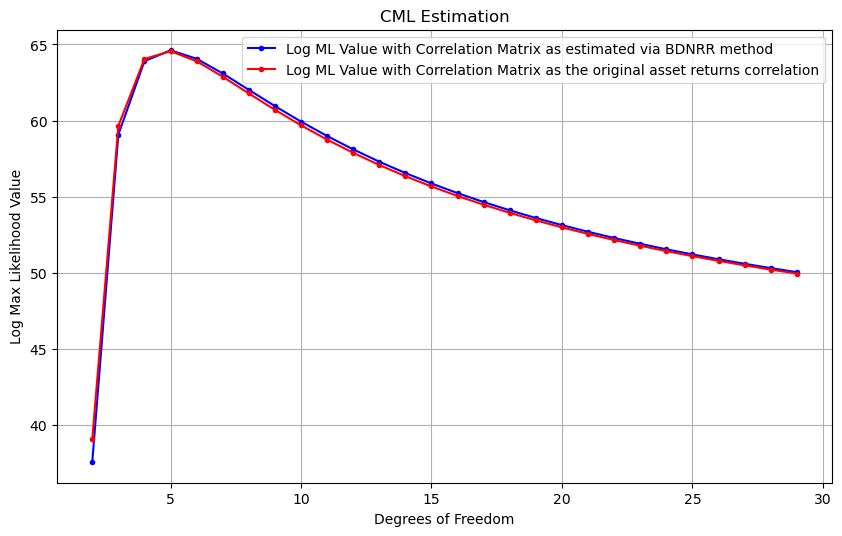

In [25]:
plt.figure(figsize=(10,6))
plt.plot(Array_of_DoF_Bouye, LogML_Bouye, marker='.', lw=1.5, \
         color='blue', label ='Log ML Value with Correlation Matrix as estimated via BDNRR method' )
plt.plot(Array_of_DoF, LogML, marker='.', lw=1.5,  \
         color='red', label ='Log ML Value with Correlation Matrix as the original asset returns correlation')
plt.legend()
plt.xlabel('Degrees of Freedom')  
plt.ylabel('Log Max Likelihood Value')
plt.grid(True)
plt.title("CML Estimation");
plt.show()

** It looks like the benefit from estimating the correlation matrix with BDNRR method is minimal, at least with our dataset **

#### Mashal and Zeevi method 

We now implement our function for the estimation of the correlation matrix under Mashal and Zeevi method 

In [26]:
def CML_MM(U):
# ***************************************************
# This algo only deals with a bivarite example ONLY 
# It estimates the 2 by 2 correlation matrix for the 
# Student's t copula via Mashal and Zeevi algo.
# ***************************************************
    
    # U_st: is the empirical marginal transformation of asset returns
    
    N = 2        # The correlation matrix is a 2 by 2 matrix
    T = len(U)   # the size of the equity return data set

    CorrMatrix = np.zeros((2,2))    
    
    tau, p_value    = stats.kendalltau(U[:,0], U[:,1])
    CorrMatrix[1,0] = math.sin(math.pi*0.5*tau)
    CorrMatrix[0,1] = CorrMatrix[1,0]
    CorrMatrix[0,0] = 1.0
    CorrMatrix[1,1] = 1.0
      
    return CorrMatrix

In [27]:
Corr_Matrix_MZ = CML_MM(U)
print(Corr_Matrix_MZ)

[[1.         0.29438596]
 [0.29438596 1.        ]]


In [28]:
Array_of_DoF_MZ = []
LogML_MZ        = []

for degree_of_freedom in range(2,30):
    res = t_copula_LogL(U_emp, degree_of_freedom, Corr_Matrix_MZ[1,0] )
    print("dof", degree_of_freedom, " - ", res)
    Array_of_DoF_MZ.append(degree_of_freedom)
    LogML_MZ.append(res)    

dof 2  -  38.46984171633331
dof 3  -  59.490988649661325
dof 4  -  64.08678469963203
dof 5  -  64.69159347537851
dof 6  -  64.08542311621737
dof 7  -  63.094508756320735
dof 8  -  62.00774607199764
dof 9  -  60.934843343087245
dof 10  -  59.91764421569329
dof 11  -  58.97012640457248
dof 12  -  58.09434841248058
dof 13  -  57.28729141088781
dof 14  -  56.54393942594411
dof 15  -  55.85869898380329
dof 16  -  55.22605056984577
dof 17  -  54.640832423505984
dof 18  -  54.09834602944132
dof 19  -  53.59437530945399
dof 20  -  53.125165464402286
dof 21  -  52.68738464591955
dof 22  -  52.27808033921792
dof 23  -  51.8946357079467
dof 24  -  51.534729018803404
dof 25  -  51.19629725307729
dof 26  -  50.87750350289898
dof 27  -  50.57670872370943
dof 28  -  50.29244700132054
dof 29  -  50.02340426775251


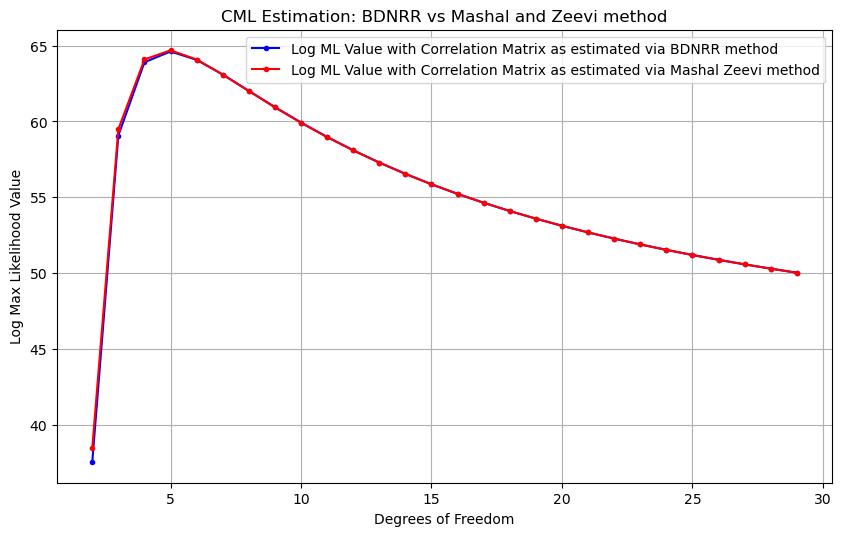

In [29]:
plt.figure(figsize=(10,6))
plt.plot(Array_of_DoF_Bouye, LogML_Bouye, marker='.', lw=1.5, \
         color='blue', label ='Log ML Value with Correlation Matrix as estimated via BDNRR method' )
plt.plot(Array_of_DoF_MZ, LogML_MZ, marker='.', lw=1.5,  \
         color='red', label ='Log ML Value with Correlation Matrix as estimated via Mashal Zeevi method')
plt.legend()
plt.xlabel('Degrees of Freedom')  
plt.ylabel('Log Max Likelihood Value')
plt.grid(True)
plt.title("CML Estimation: BDNRR vs Mashal and Zeevi method");
plt.show()

#### BDNRR estimation results: correlation matrix and dof 

In [30]:
MaxValue_BDNRR = np.max(LogML_Bouye)
DoF_BDNRR      = np.where(LogML_Bouye == MaxValue_BDNRR)[0][0]
print("BDNRR - The max LogLL Value of", np.round(MaxValue_BDNRR,3), "is reached with", Array_of_DoF_Bouye[DoF_BDNRR], "DoF")

CorrMatrixBDNRR =  CML_BDNRR(RR, DoF_BDNRR, SS, False)
print("with Correlation Matrix")
print(np.round(CorrMatrixBDNRR,4))

BDNRR - The max LogLL Value of 64.616 is reached with 5 DoF
with Correlation Matrix
[[1.     0.3108]
 [0.3108 1.    ]]


#### Mashal and Zeevi estimation results: correlation matrix and dof 

In [31]:
MaxValue_MZ = np.max(LogML_MZ)
DoF_MZ      = np.where(LogML_MZ == MaxValue_MZ)[0][0]
print("MZ - The max LogLL Value of", np.round(MaxValue_MZ,3), "is reached with", Array_of_DoF_MZ[DoF_MZ], "DoF")
print("with Correlation Matrix")
print(np.round(Corr_Matrix_MZ,4))

MZ - The max LogLL Value of 64.692 is reached with 5 DoF
with Correlation Matrix
[[1.     0.2944]
 [0.2944 1.    ]]


** We are NOT too far from the results in R **

Can we do any better?

Let's decrease the unit delta steps applied to the degrees of freedom when runnnig the t_copula_LogL function with Mashal and Zeevi method. 

Obviously, we could use the object $root$ from scipy.optimize, but not this time.

In [32]:
Array_of_DoF_MZ_2 = []
LogML_MZ_2        = []

for degree_of_freedom in np.linspace(3.5,5.5,50): #delta steps applied to the degrees of freedom
    res = t_copula_LogL(U_emp, degree_of_freedom, Corr_Matrix_MZ[1,0] )
    Array_of_DoF_MZ_2.append(degree_of_freedom)
    LogML_MZ_2.append(res)  

In [34]:
MaxValue_MZ_2 = np.max(LogML_MZ_2)
DoF_MZ_2      = np.where(LogML_MZ_2 == MaxValue_MZ_2)[0][0]
print("MZ - The max LogLL Value of", np.round(MaxValue_MZ_2,3), "is reached with", \
      np.round(Array_of_DoF_MZ_2[DoF_MZ_2],3), "DoF")
print("with Correlation Matrix")
print(np.round(Corr_Matrix_MZ,4))

MZ - The max LogLL Value of 64.712 is reached with 4.806 DoF
with Correlation Matrix
[[1.     0.2944]
 [0.2944 1.    ]]


** We are much closer now to the results in R **